### Übung 04 - Bewegungsartefakte

## Hinweis

In einigen Aufgaben wählen sie selbsständig Werte um Funktionen aufzurufen. Sollten sie nach Abschluss der Aufgaben noch Zeit haben, nutzen sie die Gelegenheit und probieren sie die Werte interaktiv zu setzen um zum Beispiel mit Schiebereglern ein besseres Verständnis für Auswirkungen und Nebeneffekte von verschiedenen Eingabewerten zu erhalten.

[ipywidgets](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Numeric-widgets)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from helper import *

In [3]:
# platzieren Sie die Datei "phantom_256x256.npy" im selben Ordner wie dieses Notebook, bevor Sie diese Zelle ausführen
plt.rcParams["figure.figsize"] = (20,10)
kspace = np.load('phantom_256x256.npy')
image = np.fft.ifftshift(np.fft.ifft2(np.fft.ifftshift(kspace)))

Erstes ifftshift für die Phase das zweite für den Betrag.

## Aufgabe 1 - Translationsbewegung

Eine Translationsbewegung ist eine Verschiebung eines Objektes im Raum. Das heißt, das zu scannende Objekt wird zum Beispiel in x- oder y-Richtung verschoben. Simulieren Sie eine Translationsbewegung, indem Sie das Objekt im rekonstruierten Bild (in der Variable `image`) verschieden weit in x- und/oder -y Richtung verschieben.
Transformieren Sie das verschobene Bild dann wieder in den k-Raum. Probieren Sie das ganze für verschieden starke Translationsbewegungen und -richtungen aus und beobachten Sie den Effekt der Translationsbewegung auf den k-Raum (Betrag und Phase).

Tipp 1: Definieren Sie sich zunächst eine Funktion, die die Transformation in den k-Raum durchführt. Testen Sie die Funktion, indem Sie das Ergebnis Ihrer Funktion mit dem ursprünglichen k-Raum (in der Variable `kspace`) vergleichen.

Tipp 2: Für die Translationsbewegung könnte die Funktion `numpy.roll` helfen.

Tipp 3: Nutzen Sie beim k-Raum für die Visualisierung immer eine logarithmische Skala für den Betrag und eine lineare Skala für die Phase.

Tipp 4: Es kann für die Beobachtung helfen Slider für die x- und y-Verschiebung zu verwenden (über ipywidgets)

True


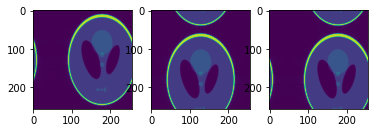

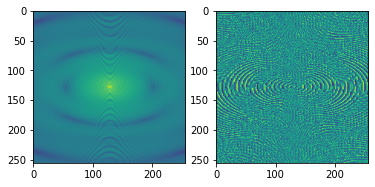

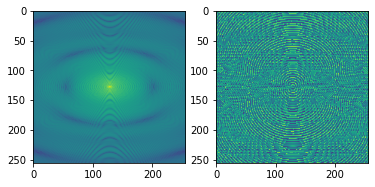

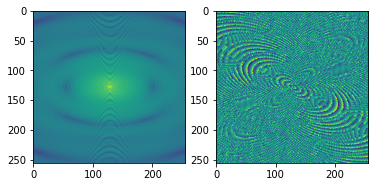

In [4]:
def translation(image, delta):
    return np.roll(image, delta, axis=(1, 0))

print(np.all(np.isclose(kspace, fft(image))))

transl_images = np.dstack((translation(image, (50, 0)), translation(image, (0, 50)), translation(image, (50, 50))))
# print(transl_images)
transl_kspaces = fft(transl_images, axes=(0, 1))
visualize_images(transl_images)
visualize_seperate_kspaces(transl_kspaces)


Wie verändert die Translationsbewegung den k-Raum? Überlegen Sie sich außerdem, warum das so ist.

* Die Beträge bleiben gleich nur die Phasen verändern sich
    * Das liegt daran, dass das Bild immer noch das selbe ist, daher sind die Amplituden der entsprechenden Frequenzen gleich nur der Ort die Frequenzen im Bild auftauchen hat sich verschoben. Daher haben sich nur die Phasen verändern, da die Phase die Verschiebung dieser Ortsfrequenzen beschreibt.
    * Der Zusammenhang zwischen Phasen- und Ortsverschiebung ist linear

## Aufgabe 2 - Translationsbewegung während der Aufnahme (y-Richtung)

Simulieren Sie nun, wie sich eine Translationsbewegung bei einer MRT-Aufnahme auswirkt. Das Objekt soll sich mit jeder vierten aufgenommenen k-Raum-Zeile um einen Pixel in y-Richtung bewegen. Sobald es sich um insgesamt 5 Pixel bewegt hat, soll es sich wieder in negative y-Richtung bewegen, bis es bei -5 Pixeln von der Ausgangsposition angekommen ist. Dann soll es wieder die Richtung ändern, bis es bei +5 Pixeln von der Ausgangsposition angekommen ist, usw. bis der k-Raum gefüllt ist.
Rekonstruieren Sie dann das Bild, aus dem auf diese Weise generierten k-Raum und visualisieren Sie es.

Hinweis: Die Phasenkodierung erfolgt in y-Richtung

(256, 256, 11)


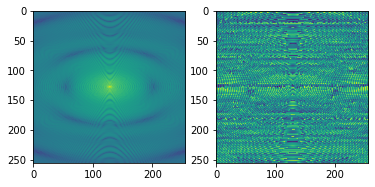

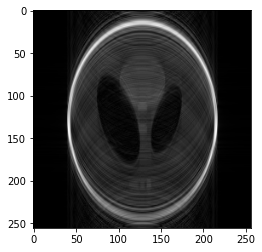

In [12]:
dmax = 5

def diff(i):
    i = (i // 4 + 5) % 20
    return i - 5 if i < 10 else 5 - (i - 10)

transl_during_kspace = np.copy(kspace)

transl_images = np.dstack((translation(image, (0, -5)), translation(image, (0, -4)), translation(image, (0, -3)), translation(image, (0, -2)), translation(image, (0, -1)), image, \
    translation(image, (0, 1)), translation(image, (0, 2)), translation(image, (0, 3)), translation(image, (0, 4)), translation(image, (0, 5))))
transl_kspaces = fft(transl_images, axes=(0, 1))

print(transl_kspaces.shape)

for i in range(transl_during_kspace.shape[0]):
    transl_during_kspace[i, :] = transl_kspaces[i, :, diff(i)]

visualize_single_kspace(transl_during_kspace)
imshow(ifft(transl_during_kspace))

Wie zeigt sich die Bewegung im Bild?


* Das Bild wiederholt sich in y-Richtung (Artefakte in y-Richtung)
    * Durch die Phasenverschiebung sind die Peaks nebeneinander, die sich vorher überlagert haben.

## Aufgabe 3 - Translationsbewegung während der Aufnahme (x-Richtung)

Führen Sie das gleiche "Experiment" wie in der vorherigen Aufgabe durch nur, dass diesmal die Bewegung in x-Richtung passieren soll.

(256, 256, 11)


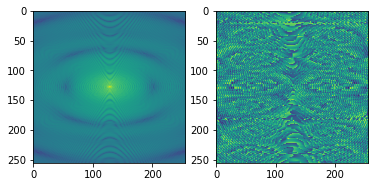

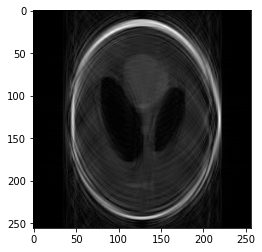

In [13]:
transl_during_kspace = np.copy(kspace)

transl_images = np.dstack((translation(image, (-5, 0)), translation(image, (-4, 0)), translation(image, (-3, 0)), translation(image, (-2, 0)), translation(image, (-1, 0)), image, \
    translation(image, (1, 0)), translation(image, (2, 0)), translation(image, (3, 0)), translation(image, (4, 0)), translation(image, (5, 0))))
transl_kspaces = fft(transl_images, axes=(0, 1))

print(transl_kspaces.shape)

for i in range(transl_during_kspace.shape[0]):
    transl_during_kspace[i, :] = transl_kspaces[i, :, diff(i)]

visualize_single_kspace(transl_during_kspace)
imshow(ifft(transl_during_kspace))

Wie zeigt sich die Bewegung nun? Vergleichen Sie dieses Bild mit dem aus der letzten Aufgabe


* Das Bild wiederholt sich in y-Richtung (Artefakte in y-Richtung)
    * In einer Zeile ist keine Bewegung
    * Die Bewegungen summieren sich in einer Spalte zusammen (beeinflusst damit die Fouriertransformation in y-Richtung mehr als die in x-Richtung)

## Aufgabe 4

Wir nehmen nun an, dass die Bewegung nur in einer Hälfte der Zeilen auftritt, und zwar einmal während der Mitte (Zeilen 64 bis 191) und einmal am Anfang & Ende (Zeilen 0 bis 63 und 192 bis 255). Simulieren Sie beide Szenarien und visualisieren Sie die entstehenden Bilder.

(256, 256, 11)


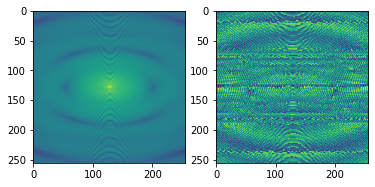

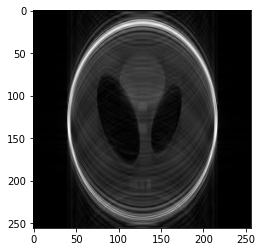

In [14]:
# Mitte: Zeile 64 bis 191
transl_during_kspace = np.copy(kspace)

transl_images = np.dstack((translation(image, (0, -5)), translation(image, (0, -4)), translation(image, (0, -3)), translation(image, (0, -2)), translation(image, (0, -1)), image, \
    translation(image, (0, 1)), translation(image, (0, 2)), translation(image, (0, 3)), translation(image, (0, 4)), translation(image, (0, 5))))
transl_kspaces = fft(transl_images, axes=(0, 1))

print(transl_kspaces.shape)

for i in range(64, 191):
    transl_during_kspace[i, :] = transl_kspaces[i, :, diff(i)]

visualize_single_kspace(transl_during_kspace)
imshow(ifft(transl_during_kspace))

(256, 256, 11)


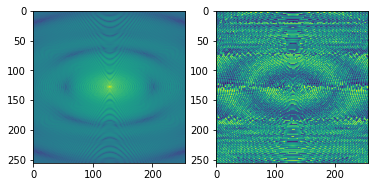

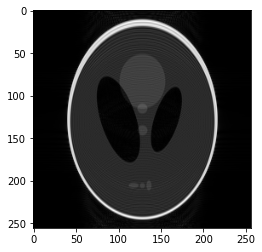

In [15]:
# Außen
transl_during_kspace = np.copy(kspace)

transl_images = np.dstack((translation(image, (0, -5)), translation(image, (0, -4)), translation(image, (0, -3)), translation(image, (0, -2)), translation(image, (0, -1)), image, \
    translation(image, (0, 1)), translation(image, (0, 2)), translation(image, (0, 3)), translation(image, (0, 4)), translation(image, (0, 5))))
transl_kspaces = fft(transl_images, axes=(0, 1))

print(transl_kspaces.shape)

for i in range(0, 64):
    transl_during_kspace[i, :] = transl_kspaces[i, :, diff(i)]

for i in range(192, 256):
    transl_during_kspace[i, :] = transl_kspaces[i, :, diff(i)]

visualize_single_kspace(transl_during_kspace)
imshow(ifft(transl_during_kspace))

Was fällt auf?


* Außen:
    * Bessere Bildqualität
    * Nur hohe Frequenzen sind betroffen
* Mitte:
    * Schlechtere Bildqualität
    * Nur niedrige Frequenzen sind betroffen
    * K-Raum Mitte ist wichtiger für die Bildqualität

## Aufgabe 5 - Rotationsbewegung

In dieser Aufgabe werden wir den Einfluss von Rotationsbewegungen auf den k-Raum untersuchen. Simulieren Sie daher ähnlich wie in Aufgabe 1 ein Rotationsbewegung, indem Sie das Objekt im Bildraum um verschiedene Winkel rotieren und den Effekt auf den k-Raum beobachten.

Tipp: Für die Rotation lohnt sich ein Blick auf die Funktion `scipy.ndimage.rotate`


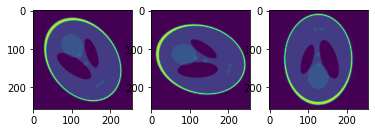

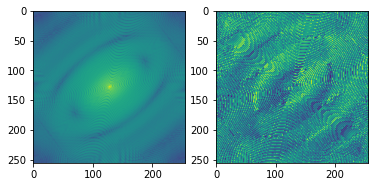

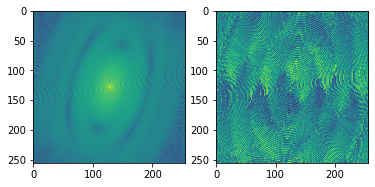

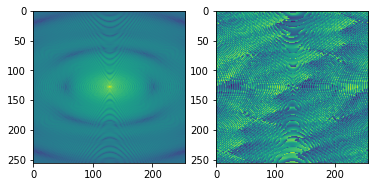

In [17]:
from scipy.ndimage import rotate

rot_images = np.dstack((rotate(image, 37, reshape=False), rotate(image, 74, reshape=False), rotate(image, 180, reshape=False)))
rot_kspaces = fft(rot_images, axes=(0, 1))
visualize_images(rot_images)
visualize_seperate_kspaces(rot_kspaces)

Beschreiben Sie, wie sich die Rotationsbewegung auswirkt und überlegen Sie, warum das so sein könnte.


* Betrag und Phase verändern sich gleich
    * Im K-Raum passiert das Gleiche wie im Bildraum
    * Die Richtung der Frequenzen wird ebenfalls gedreht

## Aufgabe 6 - Rotationsbewegung während der Aufnahme

Ähnlich wie in den Aufgaben 2 und 3 soll nun simuliert werden, dass das Objekt sich während der Aufnahme bewegt. Das Objekt soll alternierend zwischen +2° und -2° vom Ausgangszustand rotiert werden. Mit jeder aufgenommenen Zeile, soll es um 2° (bzw. -2°) rotiert werden.
Visualisieren Sie das dabei entstandene Bild.

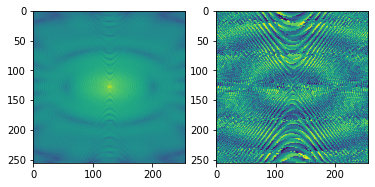

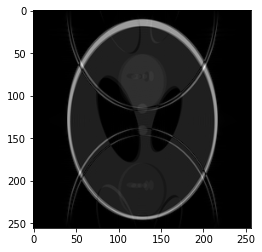

In [19]:
rotation_during_kspace = np.copy(kspace)

rot_images = np.dstack((rotate(image, 2, reshape=False), rotate(image, -2, reshape=False)))
rot_kspaces = fft(rot_images, axes=(0, 1))

for i in range(rotation_during_kspace.shape[0]):
    rotation_during_kspace[i, :] = rot_kspaces[i, :, i % 2]

visualize_single_kspace(rotation_during_kspace)
imshow(ifft(rotation_during_kspace))

Beschreiben Sie, was auf dem Bild zu sehen ist. Wie ist das zu erklären?


* Rotation außen stärker als in der Mitte

* Es gibt eine Bildüberlagerung
    * Das Nuiquist-Theorem wird verletzt
    * Die K-Raum Zeilen rotieren
        * Die Mittlere Spalte hat immer noch die selben Abstände zwischen den Zeilen
        * Die Äußeren Spalten haben unterschiedlich große Abstände zwischen den Zeilen => Nuiquist wird verletzt
